In [1]:
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv('X_data.csv')

df2 = pd.read_csv('Y_data.csv')

In [3]:
df1 = preprocessing.scale(df1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [5]:
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [6]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [earlystopper])

history_dict = history.history

Epoch 00099: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

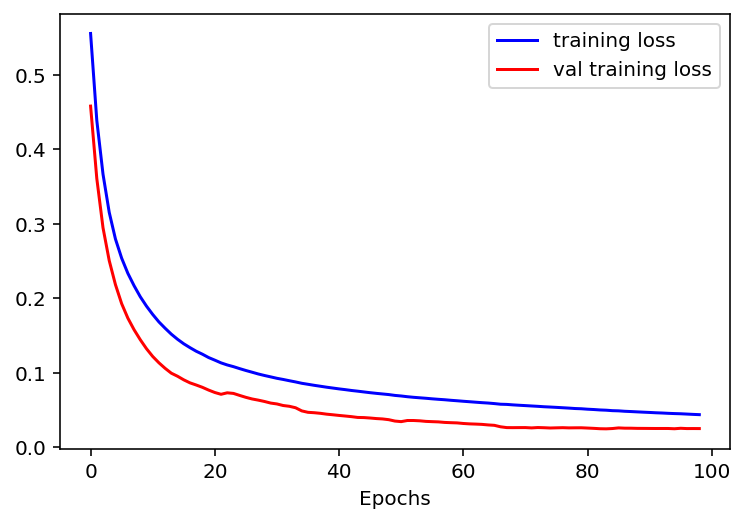

In [7]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [8]:
accuracy_values = history_dict['acc']
val_accuracy_values = history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-g',label='acc')
plt.legend()

KeyError: 'acc'

In [9]:
acc=history.history['acc']
accuracy_values = history_dict['acc']
val_accuracy_values = history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-g',label='acc')
plt.legend()

KeyError: 'acc'

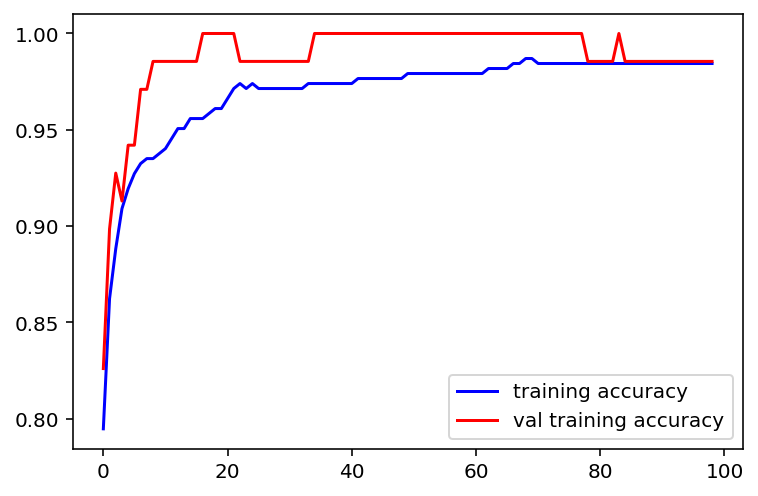

In [10]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(accuracy_values,'b',label='training accuracy')
plt.plot(val_accuracy_values,'r',label='val training accuracy')
plt.legend()

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

114/114 [==============================] - 0s 61us/step
Test loss:  0.08921389049736031
Test accuracy:  0.9736841917037964


In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9974747474747475


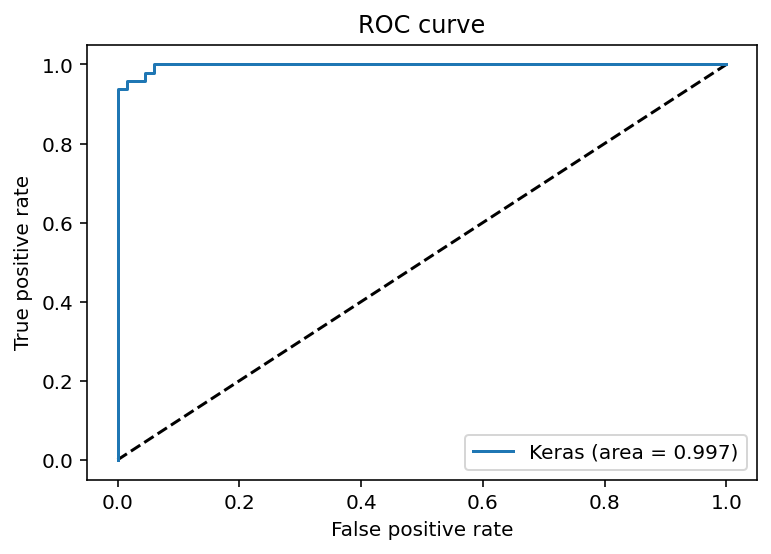

In [13]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [14]:
y_train_cat = to_categorical(y_train)

In [15]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy' optimizer=Adam(lr=0.0001), metrics=['accuracy'])

SyntaxError: invalid syntax (<ipython-input-15-15a5d5e19d3d>, line 4)

In [16]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [17]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [earlystopper])

history_dict = history.history

Epoch 01535: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

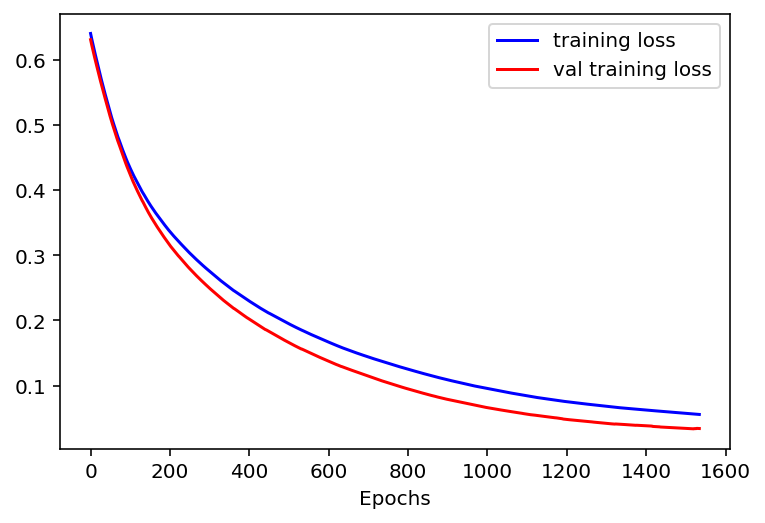

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

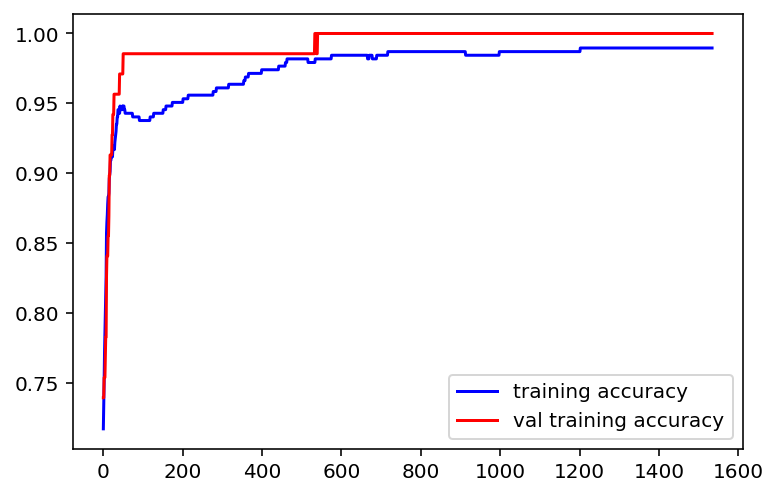

In [19]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(accuracy_values,'b',label='training accuracy')
plt.plot(val_accuracy_values,'r',label='val training accuracy')
plt.legend()

In [20]:
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

114/114 [==============================] - 0s 61us/step
Test loss:  0.09668216138686005
Test accuracy:  0.9824561476707458


In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9971590909090908


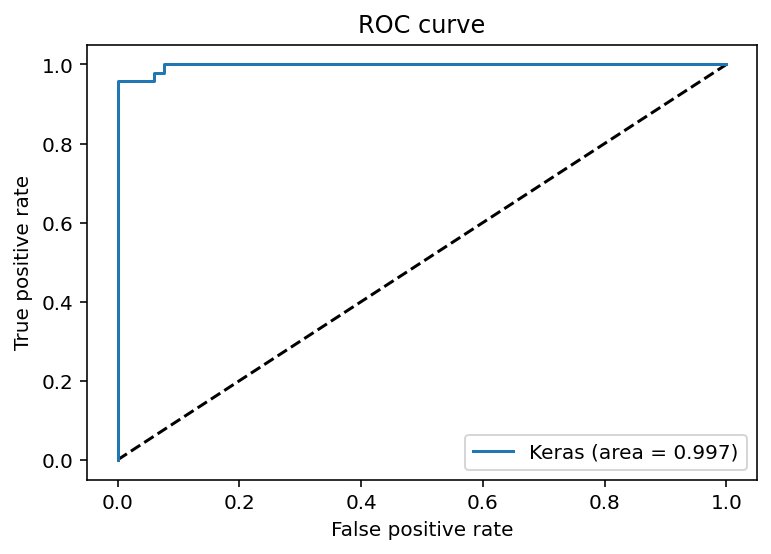

In [22]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [23]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [24]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1, shuffle = True, verbose = 0, callbacks = [earlystopper])

history_dict = history.history

Epoch 02216: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

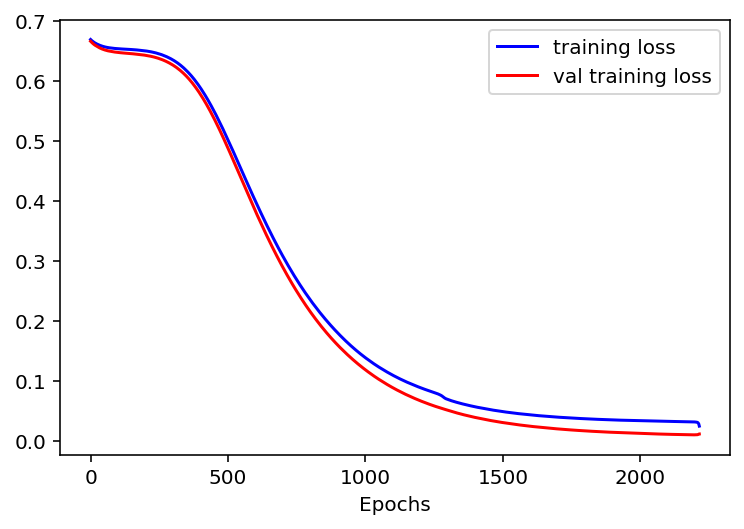

In [25]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

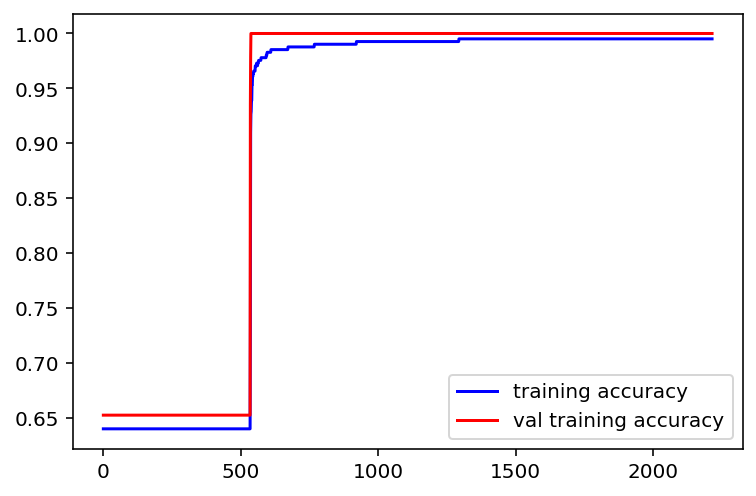

In [26]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(accuracy_values,'b',label='training accuracy')
plt.plot(val_accuracy_values,'r',label='val training accuracy')
plt.legend()

In [27]:
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

114/114 [==============================] - 0s 61us/step
Test loss:  0.12616761616970362
Test accuracy:  0.9736841917037964


In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9914772727272727


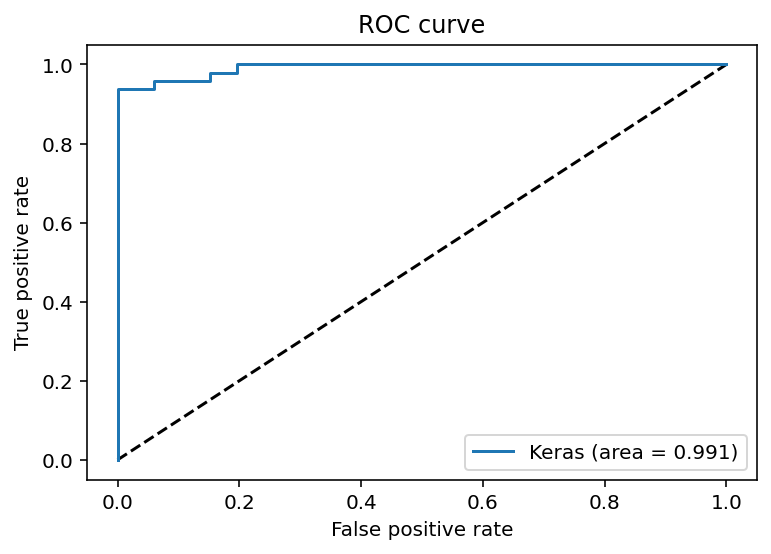

In [29]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [30]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [31]:
initial_weights = model.get_weights()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [33]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 45, 181, 317, 453])

In [34]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    y_train_frac = to_categorical(y_train_frac)
    
    model.set_weights(intial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                 verbose=0,
                 epochs = 1000,
                 callbacks = [EarlyStopping(monitor='loss', patience=20)])
    
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])

NameError: name 'intial_weights' is not defined

In [35]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    y_train_frac = to_categorical(y_train_frac)
    
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                 verbose=0,
                 epochs = 1000,
                 callbacks = [EarlyStopping(monitor='loss', patience=20)])
    
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])